In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [81]:
real_news = pd.read_csv('../data/True.csv')
fake_news = pd.read_csv('../data/Fake.csv')
display(fake_news.info())
display(real_news.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


None

# Data Integrity

In [82]:
fake_news[fake_news.date.str.len() > 20]

title  \
9358   https://100percentfedup.com/served-roy-moore-v...   
15507  https://100percentfedup.com/video-hillary-aske...   
15508  https://100percentfedup.com/12-yr-old-black-co...   
15839  https://fedup.wpengine.com/wp-content/uploads/...   
15840  https://fedup.wpengine.com/wp-content/uploads/...   
17432  https://fedup.wpengine.com/wp-content/uploads/...   
17433  https://fedup.wpengine.com/wp-content/uploads/...   
18933                                           Homepage   
21869  https://fedup.wpengine.com/wp-content/uploads/...   
21870  https://fedup.wpengine.com/wp-content/uploads/...   

                                                    text          subject  \
9358   https://100percentfedup.com/served-roy-moore-v...         politics   
15507  https://100percentfedup.com/video-hillary-aske...         politics   
15508  https://100percentfedup.com/12-yr-old-black-co...         politics   
15839  https://fedup.wpengine.com/wp-content/uploads/...         politics   
15840  https://fedup.wpengine.com/wp-content/uploads/...         politics   
17432  https://fedup.wpengine.com/wp-content/uploads/...  Government News   
17433  https://fedup.wpengine.com/wp-content/uploads/...  Government News   
18933  [vc_row][vc_column width= 1/1 ][td_block_trend...        left-news   
21869  https://fedup.wpengine.com/wp-content/uploads/...        left-news   
21870  https://fedup.wpengine.com/wp-content/uploads/...        left-news   

                                                    date  
9358   https://100percentfedup.com/served-roy-moore-v...  
15507  https://100percentfedup.com/video-hillary-aske...  
15508  https://100percentfedup.com/12-yr-old-black-co...  
15839  https://fedup.wpengine.com/wp-content/uploads/...  
15840  https://fedup.wpengine.com/wp-content/uploads/...  
17432  https://fedup.wpengine.com/wp-content/uploads/...  
17433  https://fedup.wpengine.com/wp-content/uploads/...  
18933  MSNBC HOST Rudely Assumes Steel Worker Would N...  
21869  https://fedup.wpengine.com/wp-content/uploads/...  
21870  https://fedup.wpengine.com/wp-content/uploads/...

So far the real news dataset looks good, but the fake_news dataset has some entries that are not what are expected.  We see above that links have been included, rather than text, titles, and dates.  We are going to filter those out.

Once those are gone, Pandas can set the date column to a datetime type for us.

In [83]:
fake_news = fake_news[fake_news.date.str.len() < 20]
fake_news.date = pd.to_datetime(fake_news.date)
real_news.date = pd.to_datetime(real_news.date)
display(real_news.info())
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    21417 non-null  object        
 1   text     21417 non-null  object        
 2   subject  21417 non-null  object        
 3   date     21417 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 669.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23471 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    23471 non-null  object        
 1   text     23471 non-null  object        
 2   subject  23471 non-null  object        
 3   date     23471 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 916.8+ KB


In [87]:
display(real_news.sample(10))
display(fake_news.sample(10))

title  \
3587   Russians talked about influencing Trump throug...   
17869  Malaysia's royals call for religious tolerance...   
4870   Trump ramps up fight for votes on U.S. healthc...   
6002   U.S. federal employee 'gag orders' may be ille...   
894    Trump: Sending New York City suspect to Guanta...   
15155     Lebanon's grand mufti calls for national unity   
2577   As U.S. weighs Afghan strategy, hopes set on f...   
11262  Democratic presidential candidate Bernie Sande...   
9037   Peru president-elect jokes about ending ties w...   
20614  Zimbabwe to start compiling new voter register...   

                                                    text       subject  \
3587   WASHINGTON (Reuters) - U.S. spies learned last...  politicsNews   
17869  KUALA LUMPUR (Reuters) - Malaysia s royals mad...     worldnews   
4870   WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
6002   WASHINGTON (Reuters) - Senior Democratic lawma...  politicsNews   
894    WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
15155  BEIRUT (Reuters) - Lebanon s grand mufti, the ...     worldnews   
2577   KABUL (Reuters) - (This version of the July 23...  politicsNews   
11262  WASHINGTON (Reuters) - U.S. presidential candi...  politicsNews   
9037   LIMA (Reuters) - Peru’s president-elect Pedro ...  politicsNews   
20614  HARARE (Reuters) - President Robert Mugabe on ...     worldnews   

            date  
3587  2017-05-24  
17869 2017-10-10  
4870  2017-03-17  
6002  2017-01-26  
894   2017-11-02  
15155 2017-11-10  
2577  2017-07-23  
11262 2016-01-13  
9037  2016-06-21  
20614 2017-09-08

title  \
18586  WHAT THE MEDIA’S NOT TELLING YOU About The Man...   
22502        TOXIC CULTURE: ‘Suicide (Skank) Squad’ Film   
12179  MEGYN KELLY Reportedly Not Very Popular With F...   
10877  ‘NOT WITTINGLY’ JAMES CLAPPER Reveals Anti-Tru...   
3912    BREAKING: Dir. Comey Just CRUSHED The GOP’s F...   
2269    WATCH: Morning Joe Hosts Are DONE With Trump ...   
679     Top Republicans TRASH Trump’s Immigration Pro...   
2109    Former Tea Party Congressman Brought In Court...   
22591  CRIMINAL: Details Emerge of Washington’s ‘Fast...   
16471  CNN ANCHOR Shockingly Tries To Support Obama’s...   

                                                    text          subject  \
18586  Just another nice immigrant family trying to a...        left-news   
22502  Jay Dyer 21st Century WireSuicide squad is who...          US_News   
12179   Everybody in the building is sick of it. We a...         politics   
10877  All you have to do is listen to Clapper lie be...         politics   
3912   House Oversight Committee Chairman Jason Chaff...             News   
2269   Donald Trump just ruined any remaining chance ...             News   
679    Donald Trump has successfully torn the Republi...             News   
2109   Former Texas Republican Rep. Steve Stockman s ...             News   
22591  21st Century Wire says No doubt about it. In c...          US_News   
16471  CNN is ridiculous but this is insane! Check ou...  Government News   

            date  
18586 2017-05-23  
22502 2016-08-21  
12179 2016-12-09  
10877 2017-05-15  
3912  2016-11-06  
2269  2017-03-06  
679   2017-08-03  
2109  2017-03-17  
22591 2016-04-13  
16471 2016-08-07

## Visual Inspection Observations

* The real news titles do not seem to be in title case, while the fake news titles are.  

* We also see a lot of words written in ALL CAPS in the fake news, but not in the real news.  

* Finally, the real news articles start with the location and source, while the fake news does not.

These seem to indicate formatting choices.  Are these taken directly from the source and appearing as is?  Could it be true that fake news does not have bylines?  This seems like a poor choice of feature to predict on as well, as it is a trivial formatting difference and won't necessarily translate to articles formatted in a different way.  

We will need to eliminate these formatting differences in our preprocessing.

In [85]:


print('Real news max, min and median string length in title column')
display(real_news.title.str.len().max())
display(real_news.title.str.len().min())
display(real_news.title.str.len().median())

print('Fake news max, min and median string length in title column')
display(fake_news.title.str.len().max())
display(fake_news.title.str.len().min())
display(fake_news.title.str.len().median())

print('Real news max, min and median string length in text column')
display(real_news.text.str.len().max())
display(real_news.text.str.len().min())
display(real_news.text.str.len().median())

print('Fake News max, min and median string length in text column')
display(fake_news.text.str.len().max())
display(fake_news.text.str.len().min())
display(fake_news.text.str.len().median())

print('Value Counts in subject Column')
display(real_news.subject.value_counts())
display(fake_news.subject.value_counts())

print('Real news max, min and median value in date column')
display(real_news.date.max())
display(real_news.date.min())
display(real_news.date.median())

print('Fake news max, min and median value in date column')
display(fake_news.date.max())
display(fake_news.date.min())
display(fake_news.date.median())

Real news max, min and median string length in title column


133

26

64.0

Fake news max, min and median string length in title column


286

15

90.0

Real news max, min and median string length in text column


29781

1

2222.0

Fake News max, min and median string length in text column


51794

1

2166.0

Value Counts in subject Column


politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

News               9050
politics           6836
left-news          4456
Government News    1568
US_News             783
Middle-east         778
Name: subject, dtype: int64

Real news max, min and median value in date column


Timestamp('2017-12-31 00:00:00')

Timestamp('2016-01-13 00:00:00')

Timestamp('2017-09-13 00:00:00')

Fake news max, min and median value in date column


Timestamp('2018-02-19 00:00:00')

Timestamp('2015-03-31 00:00:00')

Timestamp('2016-10-14 00:00:00')

# Features:

### Title: (text)

* Title string lengths in the real news dataset runs from 26 characters to 133 with a median of 64 characters.  

* The length of the titles in the fake news set run from 15 to 286 with a median of 90.

* The median length of the title of a fake news set is almost 50% longer than the real news dataset.  The length of a title may make a good candidate for a predictor variable.

### Text: (text)

* Text strings in the real news set range from 1 to 29,781 characters with a median of 2222.

* Text strings in the fake news set range from 1 to 51,794 characters with a median of 2166.

* While the max article length in the fake news set is much longer than the longest real news story, the median length is pretty much the same.  Text length may not be a good predictor.

* *However* the presence of texts of length 1 mean we have some more data cleaning to do.  1 is not a realistic length for a article.

### Subject: (category)

* In the real news data, the distribution of subject values is pretty much evenly split between 'politicsNews' and 'worldnews'.  On the other hand, the fake news article subjects are split between 6 different categories, with 1 order of magnitude different between the most and least represented categories.  **None of the categories directly align.**  However, we could deduce some overlap, for instance between 'politicsNews' and 'politics', but other categories do not seem to line up.

* I would consider dropping the subject column altogether as unhelpful.

### Date: (datetime)

* The dates of publication of the articles in the real news set range from January 13th, 2016 to December 31st 2017.  The median date is September 13th, 2017.  This implies that the majority of articles are taken from the second half of 2017.

* The dates of publication of the articles in the fake news set range from March 31st 2015 to February 19th, 2018.  The median date is 10-14-2016.

* While the period of time that the fake news was gathered from is twice as long as the period from which the real news is drawn from, the median date is very close.  I don't know what this means as far as data validity, but the similar medians imply this may not be a predictive variable.


## String Lengths:

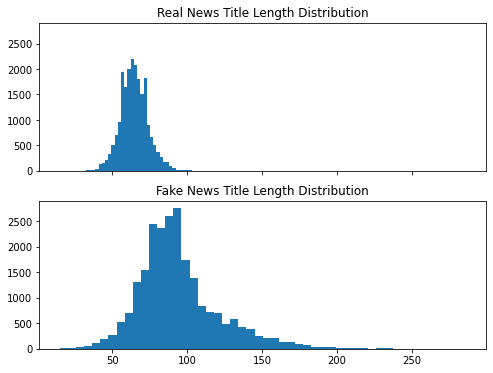

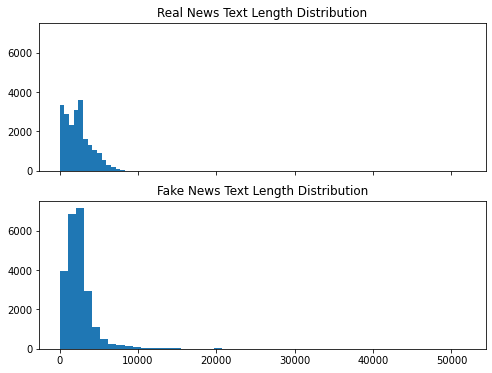

In [102]:
fig, axes = plt.subplots(2,1, sharex=True, sharey=True, figsize = (8,6))

axes[0].hist(real_news.title.str.len(), bins=50)
axes[0].set_title('Real News Title Length Distribution')

axes[1].hist(fake_news.title.str.len(), bins=50)
axes[1].set_title('Fake News Title Length Distribution')
plt.show()

fig, axes = plt.subplots(2,1, sharex=True, sharey=True, figsize = (8,6))

axes[0].hist(real_news.text.str.len(), bins=50)
axes[0].set_title('Real News Text Length Distribution')

axes[1].hist(fake_news.text.str.len(), bins=50)
axes[1].set_title('Fake News Text Length Distribution')
plt.show()

Indeed, we see that the titles of fake news articles in this dataset tend to be longer, but also have a wider distribution.  On the other hand the lengths of the texts of the articles are, on average, similar, but the distribution is somewhat different.

Also of note is the skew of the article lengths.  Nearly all of the articles are under 10,000 words, but both sets of articles have several times that long.  We discovered earlier that there were also articles of length 1.  We have both high and low outliers to remove.

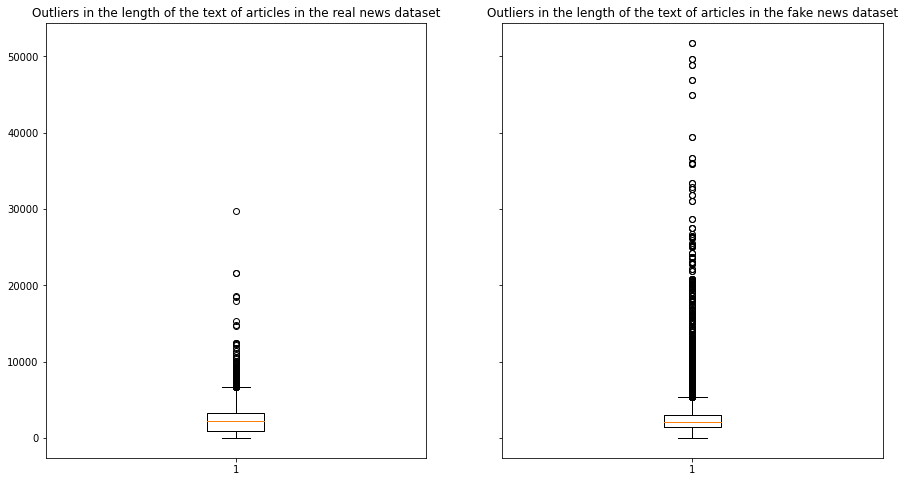

In [97]:
fig, axes = plt.subplots(1,2, figsize=(15,8), sharey=True)
axes[0].boxplot(real_news.text.str.len())
axes[0].set_title('Outliers in the length of the text of articles in the real news dataset')
axes[1].boxplot(fake_news.text.str.len())
axes[1].set_title('Outliers in the length of the text of articles in the fake news dataset')
plt.show()

## Date of Publication:


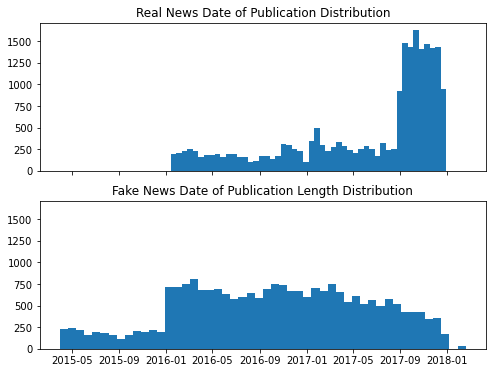

In [99]:
plt.show()
fig, axes = plt.subplots(2,1, sharex=True, sharey=True, figsize = (8,6))

axes[0].hist(real_news['date'], bins=50)
axes[0].set_title('Real News Date of Publication Distribution')

axes[1].hist(fake_news['date'], bins=50)
axes[1].set_title('Fake News Date of Publication Length Distribution')

plt.show()

We see that the real news is mostly from between September 2017 and January 2018.  However, the fake news is taken pretty evenly from as far back as January 2016.  This is an unfortunate hidden variable in our dataset, since the news is not taken from the same time periods.  We dont' want to use date as a predictor because it's not actually relevant to future articles and would overfit our model to this dataset.  

On the other hand, we may find that certain topics or words are more prevalent in one class or the other because news is about current events and these articles cover different periods and thus different events.  This is a bias we will need to keep an eye on.